morpho_syntax

Ex 1.1 Choose a wikipedia article. You will download and acces the article using this python module: wikipedia. Use the content property to extract the text. Print the title of the article and the first N=200 words from the article to verify that all works well. Print the POS-tagging for the first N=20 sentences.

In [ ]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11680 sha256=289e5a4b17a8e98539ea975f8b0525a6ea2c55fdc47a9f1276c3aae882e4522f
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [ ]:
import wikipedia
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag

def downl():
    nltk_resources = ['punkt', 'averaged_perceptron_tagger']
    for resource in nltk_resources:
        nltk.download(resource, quiet=True)

def wiki(title, lang='en'):
    wikipedia.set_lang(lang)
    return wikipedia.page(title)

def process_text(content):
    sentences = sent_tokenize(content)[:20]
    return [pos_tag(word_tokenize(sent)) for sent in sentences]

def main_func():
    downl()
    page = wiki('Company')

    print("Title of the article:", page.title)

    words = page.content.split()[:200]
    print("First 200 words of the article:")
    print(' '.join(words))

    pos_tags = process_text(page.content)
    for i, tags in enumerate(pos_tags):
        print(f"Sentence {i+1} POS-tags:")
        print(tags)

main_func()

Title of the article: Company
First 200 words of the article:
A company, abbreviated as co., is a legal entity representing an association of legal people, whether natural, juridical or a mixture of both, with a specific objective. Company members share a common purpose and unite to achieve specific, declared goals. Over time, companies have evolved to have following features: "separate legal personality, limited liability, transferable shares, investor ownership, and a managerial hierarchy". The company, as an entity, was created by the state which granted the privilege of incorporation. Companies take various forms, such as: voluntary associations, which may include nonprofit organizations business entities, whose aim is to generate sales, revenue, and profit. financial entities and banks programs or educational institutions A company can be created as a legal person so that the company itself has limited liability as members perform or fail to discharge their duties according to the

Ex 1.2 Create a function that receives a part of speech tag and returns a list with all the words from the text (can be given as a parameter too) that represent that part of speech. Create a function that receives a list of POS tags and returns a list with words having any of the given POS tags (use the first function in implementing the second one).

In [ ]:
def f1(tag, text):
    words = word_tokenize(text)
    tagged_words = pos_tag(words)
    return [word for word, pos in tagged_words if pos == tag]

def f2(tags, text):
    result_words = []
    for tag in tags:
        result_words.extend(f1(tag, text))
    return result_words

text = "The shy girl presents in front of the interested crowd."
print("Nouns:", f1('NN', text))
print("Verbs or adjectives:", f2(['VB', 'JJ'], text))


Nouns: ['girl', 'front', 'crowd']
Verbs or adjectives: ['shy', 'interested']


Ex 1.3 Use the function above to print all the nouns (there are multiple tags for nouns), and, respectively all the verbs (corresponding to all verb tags). Also, print the percentage of content words (noun+verbs) from the entire text

In [ ]:
def extract_words(tags, text):
    tagged_words = pos_tag(word_tokenize(text))
    tags_set = set(tags)
    return [word for word, pos in tagged_words if pos in tags_set]

def percentage(content_words, total_words):
    return (content_words / total_words) * 100 if total_words > 0 else 0

t = "AI technology is widely used throughout industry, government, and science. Some high-profile applications include advanced web search engines."

n = ['NN', 'NNS', 'NNP', 'NNPS']
v = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']

nouns = extract_words(n, t)
verbs = extract_words(v, t)
all_content_words = nouns + verbs

print("Nouns:", nouns)
print("Verbs:", verbs)

total_words = len(word_tokenize(t))
content_word_count = len(all_content_words)
content_word_percentage = percentage(content_word_count, total_words)

print(f"Percentage of content words (nouns + verbs): {content_word_percentage:.2f}%")


Nouns: ['AI', 'technology', 'industry', 'government', 'science', 'applications', 'search', 'engines']
Verbs: ['is', 'used', 'include']
Percentage of content words (nouns + verbs): 50.00%


Ex 1.4 Print a table of four columns. The columns will be separated with the character "|". The head of the table will be:
Original word | POS | Simple lemmatization | Lemmatization with POS
that will compare the results of lemmatization (WordNetLemmatizer) without giving the part of speech and the lemmatization with the given part of speech for each word. The table must contain only words that give different results for the two lemmatizations (for example, the word "running" - without POS, the result will always be running, but with pos="v" it is "run"). The table will contain the results for the first N sentences from the text (each row corresponding to a word). Try to print only distinct results inside the table (for example, if a word has two occurnces inside the text, and matches the requirments for appearing in the table, it should have only one corresponding row).

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

def convert_wordnet(pos):
    if pos.startswith('J'):
        return 'a'
    elif pos.startswith('V'):
        return 'v'
    elif pos.startswith('N'):
        return 'n'
    elif pos.startswith('R'):
        return 'r'
    return None

def comparison(text, n_stcs):
    lemmatizer = WordNetLemmatizer()
    stcs = sent_tokenize(text)[:n_stcs]
    results = {}

    for sentence in stcs:
        words = word_tokenize(sentence)
        tagged_words = pos_tag(words)

        for word, tag in tagged_words:
            wn_tag = convert_wordnet(tag)
            lem_word = lemmatizer.lemmatize(word)
            lem_word_with_pos = lemmatizer.lemmatize(word, wn_tag) if wn_tag else lem_word

            if lem_word != lem_word_with_pos:
                key = (word, tag, lem_word, lem_word_with_pos)
                if key not in results:
                    results[key] = True

    print("Original word | POS | Simple lemmatization | Lemmatization with POS")
    for (word, tag, lem_word, lem_word_with_pos), _ in results.items():
        print(f"{word} | {tag} | {lem_word} | {lem_word_with_pos}")

comparison(t, 2)

Original word | POS | Simple lemmatization | Lemmatization with POS
is | VBZ | is | be
used | VBN | used | use


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Ex 1.5 Print a graphic showing the number of words for each part of speech. If there are too many different parts of speech, you can print only those with a higher number of corresponding words.

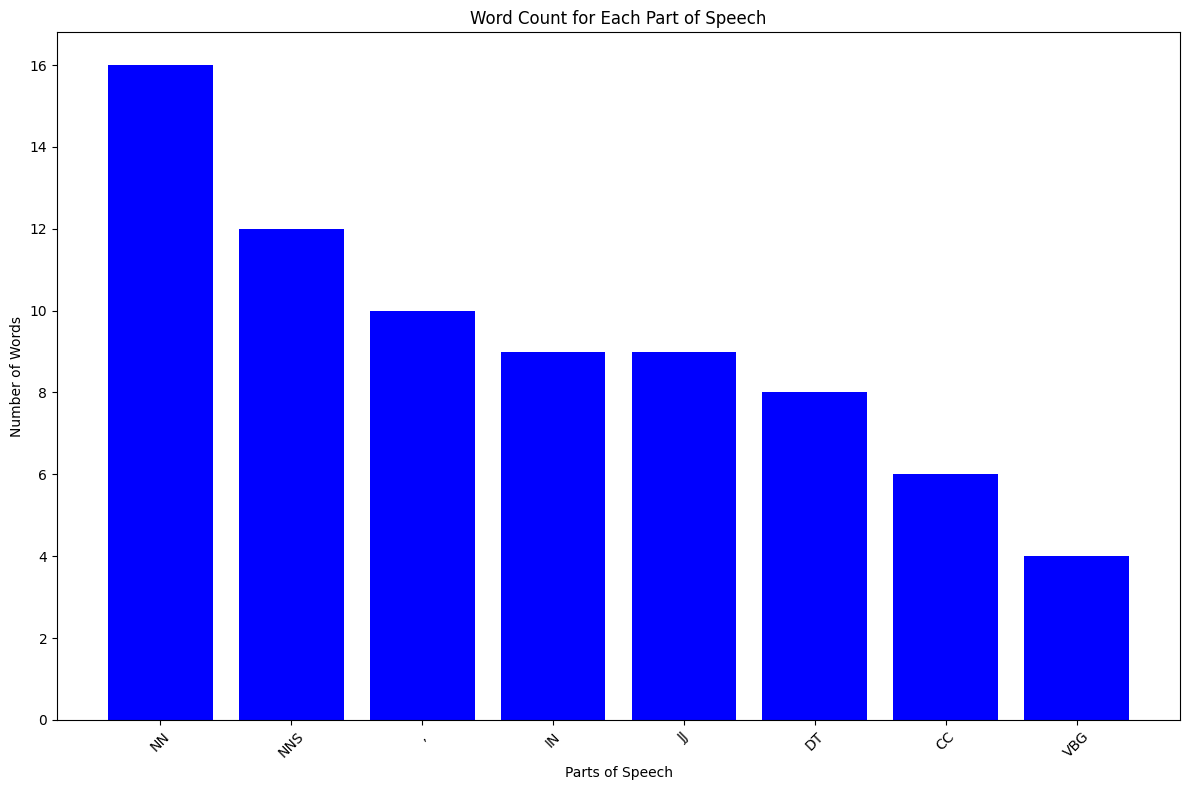

In [ ]:
import matplotlib.pyplot as plt

def plott(text):
    wds = word_tokenize(text)
    tagged_wds = pos_tag(wds)
    count_pos = {}
    for _, tag in tagged_wds:
        if tag in count_pos:
            count_pos[tag] += 1
        else:
            count_pos[tag] = 1

    threshold = 3
    filtered_count_pos = {tag: count for tag, count in count_pos.items() if count > threshold}

    labels, values = zip(*filtered_count_pos.items())

    labels, values = zip(*sorted(zip(labels, values), key=lambda x: x[1], reverse=True))

    plt.figure(figsize=(12, 8))
    plt.bar(labels, values, color='blue')
    plt.xlabel('Parts of Speech')
    plt.ylabel('Number of Words')
    plt.title('Word Count for Each Part of Speech')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
te="The growing use of artificial intelligence in the 21st century is influencing a societal and economic shift towards increased automation, data-driven decision-making, and the integration of AI systems into various economic sectors and areas of life, impacting job markets, healthcare, government, industry, and education. This raises questions about the long-term effects, ethical implications, and risks of AI, prompting discussions about regulatory policies to ensure the safety and benefits of the technology."
plott(te)

Ex 1.6 Create your own grammar with different terminal symbols. Apply recursive descent parsing on a sentence with at least 5 different parts of speech and a tree of at least level 4.

In [ ]:
class Parser:
    def __init__(self, tokens):
        self.tokens = tokens
        self.current_token = None
        self.index = 0
        self.next_token()

    def next_token(self):
        if self.index < len(self.tokens):
            self.current_token = self.tokens[self.index]
            self.index += 1
        else:
            self.current_token = None

    def match(self, expected_tokens):
        if self.current_token in expected_tokens:
            self.next_token()
            return True
        return False

    def parse_s(self):
        initial_index = self.index
        if self.parse_np() and self.parse_vp():
            if self.match(['and', 'but']):
                return self.parse_s()
            return True
        self.index = initial_index
        return False

    def parse_np(self):
        initial_index = self.index
        if self.match(['the', 'a']) and self.parse_n():
            return True
        self.index = initial_index
        return self.parse_n()

    def parse_vp(self):
        initial_index = self.index
        if self.parse_v():
            if self.current_token in ['the', 'a', 'dog', 'cat']:
                return self.parse_np()
            return True
        self.index = initial_index
        return False

    def parse_n(self):
        return self.match(['dog', 'cat'])

    def parse_v(self):
        return self.match(['chases', 'sees'])

    def parse(self):
        if not self.parse_s() or self.current_token is not None:
            print("Parsing failed. Remaining tokens:", self.tokens[self.index-1:])
            return False
        return True

tokens = ['the', 'dog', 'chases', 'the', 'cat']
parser = Parser(tokens)
print(parser.parse())


True


Ex 1.7 Apply shift reduce parsing on the same sentence and check programatically if the two trees are equal. Find a sentence with equal trees and a sentence with different results (we consider the tree different even when it has no sollution for one of the parsers, but has for the other).

In [ ]:
from nltk import CFG
from nltk.parse import ShiftReduceParser, RecursiveDescentParser

grammar = CFG.fromstring("""
  S -> NP VP
  NP -> Det N | N
  VP -> V NP | V
  Det -> 'the' | 'a'
  N -> 'girl' | 'bag'
  V -> 'carries' | 'sees'
""")

sr_parser = ShiftReduceParser(grammar)
rd_parser = RecursiveDescentParser(grammar)

sentence = 'the girl carries the bag'.split()

sr_trees = list(sr_parser.parse(sentence))
rd_trees = list(rd_parser.parse(sentence))

def compare_trees(trees1, trees2):
    trees1 = {str(tree) for tree in trees1}
    trees2 = {str(tree) for tree in trees2}
    return trees1 == trees2

comparison_result = compare_trees(sr_trees, rd_trees)
print(comparison_result)


False
